<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/HW5_PH4200_knn_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1:

1.  Read the file 'breast_cancer_dataset.csv' into a pandas dataframe.

2.  Use shape attribute to determine the number of rows and columns.

3. How many unique values are there in the last column 'class'? This is the target column.

4. Separate the values into data X and target y.

5. Make a bar plot of the values of y.
6. Split the dataset into training (70%) and test(30%) parts.
7. Use K-Nearest neighbors for training and testing with k ranging fron 1 to 20.
8. Make a plot of the training and testing accuracy as a function of k.
9. Repeat the train-test using logistic regression.

#Problem 2:

1. Repeat all the steps of problem 1 for the pima_native_american_diabetes dataset.

#Notes for self: 

1. Steps 1-5 are purely pandas driven

2. Steps 5-8 are knn driven

3. Step 9 is logistic regression driven

In [0]:
import numpy as np   #matrix/array
import pandas as pd  #Data analysis
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [0]:
#get google's magic to help you upload stuff

from google.colab import files

In [0]:
#Read the file 'breast_cancer_dataset.csv' into a pandas dataframe.
#get the file you need. 


uploaded_cancer = files.upload()

uploaded_diabetes = files.upload()


Saving breast_cancer_dataset.csv to breast_cancer_dataset.csv


Saving pima_native_american_diabetes.csv to pima_native_american_diabetes.csv


In [0]:
cancer_data = pd.read_csv('breast_cancer_dataset.csv')
display(cancer_data)
#Use shape attribute to determine the number of rows and columns.
print('Shape of Cancer Data:', cancer_data.shape, 'rows: ', cancer_data.shape[0], 'columns: ', cancer_data.shape[1])

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
564,4,1,1,1,2,1,3,2,1,2
565,5,7,10,10,5,10,10,10,1,4
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2


Shape of Cancer Data: (569, 10) rows:  569 columns:  10


In [0]:
diabetes_data = pd.read_csv('pima_native_american_diabetes.csv')
display(diabetes_data)
print('Shape of Diabetes Data:', diabetes_data.shape, 'rows: ', diabetes_data.shape[0], 'columns: ', diabetes_data.shape[1])

,times_pregnant,plasma_glucose,diastolic_blood_pressure,tricep_skin_fold_thickness,serum_insulin,body_mass_index,diabetes_pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Shape of Diabetes Data: (768, 9) rows:  768 columns:  9


In [0]:
#How many unique values are there in the last column 'class'? This is the target column.

#select las column
#these are the target column
class_column_cancer = cancer_data['class']
#display(class_column_cancer)
unique_elements_cancer_data = class_column_cancer.unique()
print('unique elements for cancer data: ', unique_elements_cancer_data)

#repreat for native american data set

class_column_diabetes = diabetes_data['class']
#display(class_column_diabetes)
unique_elements_diabetes_data = class_column_diabetes.unique()
print('unique elements for diabetes data: ', unique_elements_diabetes_data)

unique elements for cancer data:  [2 4]
unique elements for diabetes data:  [1 0]


In [0]:
#Separate the values into data X and target y.
#following Dr. Jishi's notes 

X_cancer = cancer_data.iloc[:,:-1].values
y_cancer = cancer_data.iloc[:,-1].values
X_diabetes = diabetes_data.iloc[:,:-1].values
y_diabetes = diabetes_data.iloc[:,-1].values

#Bar Plot of Target Values

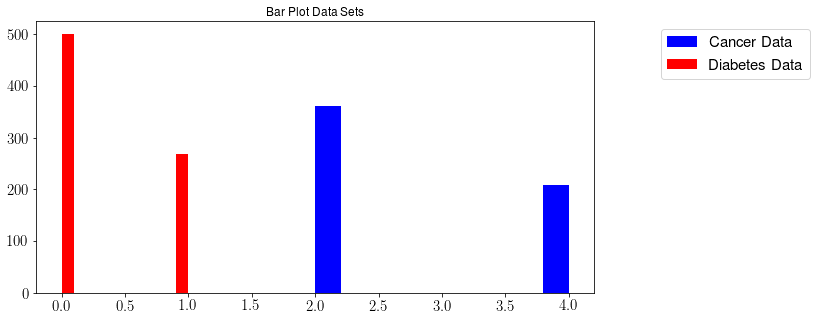

In [0]:
#Make a bar plot of the values of y.
plt.figure(figsize=(10,5))
plt.title('Bar Plot Data Sets')
plt.hist(y_cancer, color='blue', label='Cancer Data')
plt.hist(y_diabetes, color='red', label ='Diabetes Data')
plt.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1.4,1))

In [0]:
#Split the dataset into training (70%) and test(30%) parts.

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=1)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=1)

In [0]:
#Use K-Nearest neighbors for training and testing with k ranging fron 1 to 20.

k_range = np.arange(1,21,1)
acc_cancer = []
acc_diabetes = []

for i in k_range:
  #cancer first
  curr_kn_cancer = KNeighborsClassifier(n_neighbors=i)
  curr_kn_cancer.fit(X_train_cancer, y_train_cancer)
  curr_predict_cancer = curr_kn_cancer.predict(X_test_cancer)
  curr_accuracy_cancer = metrics.accuracy_score(y_test_cancer, curr_predict_cancer)
  acc_cancer.append(curr_accuracy_cancer)

  #then diabetes
  curr_kn_diabetes = KNeighborsClassifier(n_neighbors=i)
  curr_kn_diabetes.fit(X_train_diabetes, y_train_diabetes)
  curr_predict_diabetes = curr_kn_diabetes.predict(X_test_diabetes)
  curr_accuracy_diabetes = metrics.accuracy_score(y_test_diabetes, curr_predict_diabetes)
  acc_diabetes.append(curr_accuracy_diabetes)

# Plor of Accuracy vs $k$


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


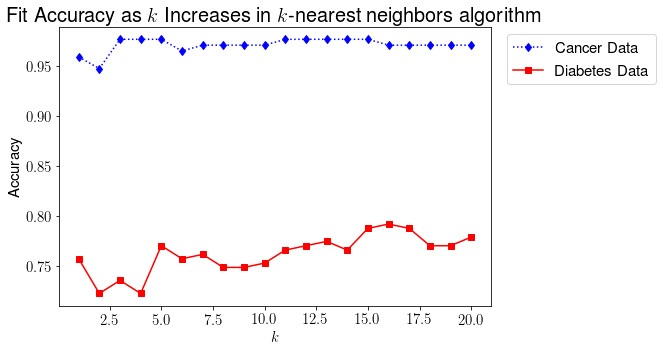

In [0]:
#Make a plot of the training and testing accuracy as a function of k.
plt.figure(figsize=(10,5))
plt.plot(k_range, acc_cancer, marker='d', color='blue', linestyle=':', label='Cancer Data')
plt.plot(k_range, acc_diabetes, marker='s', color='red', linestyle='-',label='Diabetes Data')

plt.xlabel(r'$k$', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title(r'Fit Accuracy as $k$ Increases in $k$-nearest neighbors algorithm', fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.4,1))

plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()

In [0]:
#repeat with logistic regression
#following Dr. Jishi's notes:
# Logistic regression
#logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
#metrics.accuracy_score(y_test, y_pred)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [0]:
# Logistic regression
logreg.fit(X_train_cancer, y_train_cancer)
y_pred = logreg.predict(X_test_cancer)
accuracy_cancer = metrics.accuracy_score(y_test_cancer, y_pred)
print('accuracy cancer:', accuracy_cancer)

accuracy cancer: 0.935672514619883


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# Logistic regression
logreg.fit(X_train_diabetes, y_train_diabetes)
y_pred_diabetes = logreg.predict(X_test_diabetes)
accuracy_diabetes = metrics.accuracy_score(y_test_diabetes, y_pred_diabetes)
print('accuracy diabetes:', accuracy_diabetes)

accuracy diabetes: 0.7835497835497836
